In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf. pacf 값 표현 (어떤 order이 적합한지) - stationary or unstationary
from statsmodels.tsa.arima_model import ARIMA # arima 모델
from statsmodels.tsa.statespace.sarimax import SARIMAX # seanality arima
from statsmodels.tsa.seasonal import seasonal_decompose

import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ARIMA 모델 개요

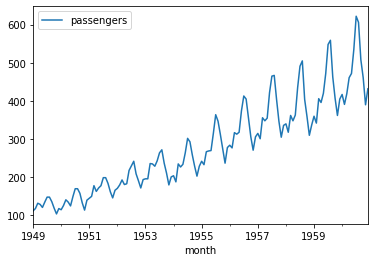

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
df = df.rename(columns={'Month':'month','#Passengers':'passengers'})
df['month'] = pd.to_datetime(df['month'])
df = df.set_index('month')
df.shape
fig = df.plot()

Text(0, 0.5, 'Residual')

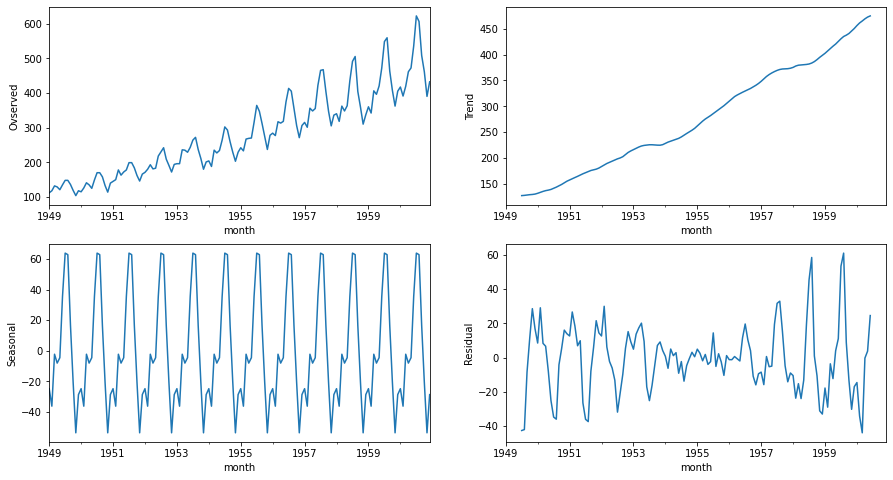

In [ ]:
decomposition = seasonal_decompose(df['passengers'], model='additive', freq=12)

fig, ax = plt.subplots(2,2, figsize=(15,8))

decomposition.observed.plot(ax=ax[0][0])
ax[0][0].set_ylabel('Ovserved')

decomposition.trend.plot(ax=ax[0][1])
ax[0][1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax[1][0])
ax[1][0].set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax[1][1])
ax[1][1].set_ylabel('Residual')

# Differencing

In [ ]:
x_train, test = train_test_split(df, test_size = 0.2, shuffle=False)

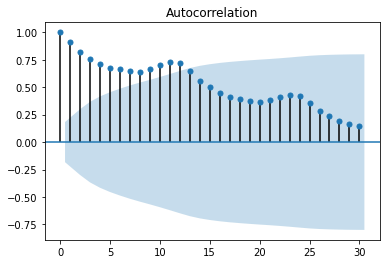

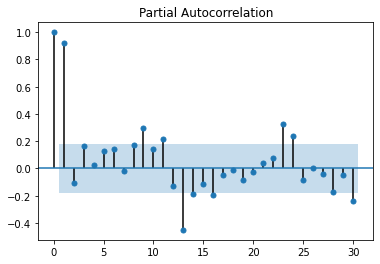

In [ ]:
sm.graphics.tsa.plot_acf(x_train.values.squeeze(), lags=30)
sm.graphics.tsa.plot_pacf(x_train.values.squeeze(), lags=30)
plt.show()

In [ ]:
diff_x_train = x_train.copy()
diff_x_train = diff_x_train['passengers'].diff()
diff_x_train = diff_x_train.dropna()


print('차분 전 수치')
print(x_train)
print('-------------------------')
print('차분 후 수치')
print(diff_x_train)



차분 전 수치
            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]
-------------------------
차분 후 수치
month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1958-03-01    44.0
1958-04-01   -14.0
1958-05-01    15.0
1958-06-01    72.0
1958-07-01    56.0
Name: passengers, Length: 114, dtype: float64


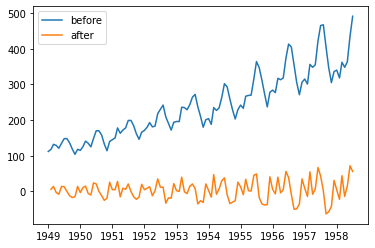

In [ ]:
plt.plot(x_train['passengers'], label='before')
plt.plot(diff_x_train, label='after')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


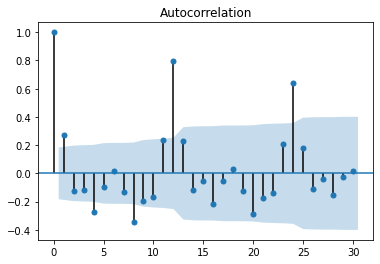

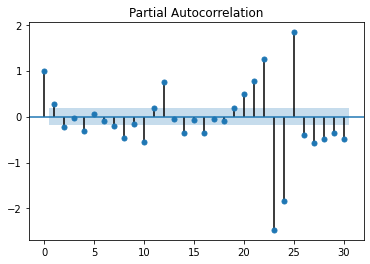

In [ ]:
sm.graphics.tsa.plot_acf(diff_x_train.values.squeeze(), lags=30)
sm.graphics.tsa.plot_pacf(diff_x_train.values.squeeze(), lags=30)
plt.show()

In [ ]:
model = ARIMA(x_train.values ,order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -531.720
Method:                       css-mle   S.D. of innovations             25.659
Date:                Fri, 01 Jul 2022   AIC                           1069.440
Time:                        08:53:49   BIC                           1077.649
Sample:                             1   HQIC                          1072.771
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5123      3.329      1.055      0.294      -3.012      10.036
ar.L1.D.y      0.2803      0.091      3.077      0.003       0.102       0.459
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5681           +0.0000j            3.5681            0.0000
-----------------------------------------------------------------------------
"""

#grid search

In [ ]:
import itertools
p=range(3)
d=range(1,2)
q=range(3)
pdq = list(itertools.product(p,d,q))

aic = []

for i in pdq:
  model = ARIMA(x_train.values, order=(i))
  model_fit = model.fit()
  print(str(i), '=', str(round(model_fit.aic, 2)))

  aic.append(model_fit.aic)

print(min(aic))

(0, 1, 0) = 1076.52
(0, 1, 1) = 1064.62
(0, 1, 2) = 1061.08
(1, 1, 0) = 1069.44
(1, 1, 1) = 1058.83
(1, 1, 2) = 1046.05
(2, 1, 0) = 1066.2
(2, 1, 1) = 1045.66
(2, 1, 2) = 1047.19
1045.6595849035502


In [ ]:
model = ARIMA(x_train.values ,order=(2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -517.830
Method:                       css-mle   S.D. of innovations             22.316
Date:                Fri, 01 Jul 2022   AIC                           1045.660
Time:                        08:53:50   BIC                           1059.341
Sample:                             1   HQIC                          1051.212
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5600      0.162     15.754      0.000       2.241       2.878
ar.L1.D.y      1.0890      0.085     12.816      0.000       0.922       1.256
ar.L2.D.y     -0.4730      0.086     -5.528      0.000      -0.641      -0.305
ma.L1.D.y     -0.9999      0.040    -25.219      0.000      -1.078      -0.922
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1512           -0.8882j            1.4540           -0.1046
AR.2            1.1512           +0.8882j            1.4540            0.1046
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred = model_fit.forecast(len(test))
pred_values = pred[0]
pred_index = list(test.index)

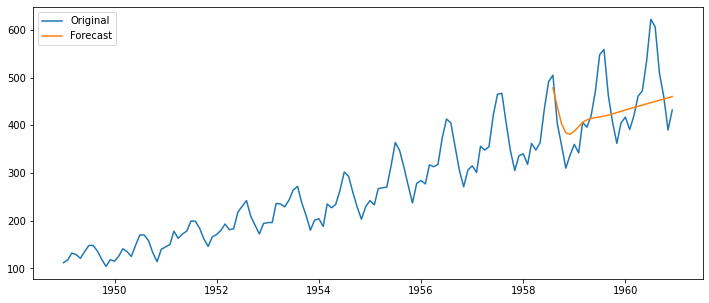

In [ ]:
plt.subplots(figsize=(12,5))
# plt.vlines(10, 0, 650, linestyles='--', color='r', label = 'Start of Forecast')
plt.plot(list(df.index), df['passengers'], label='Original')
plt.plot(pred_index, pred_values, label='Forecast')
plt.legend()

In [ ]:
p = d = q = range(0, 2)
pdq = list( itertools.product(p, d, q))
seasonal_pdq = [ (x[0], x[1], x[2], 12)  for x in pdq ]


aic = 10000000
temp_order = 0
temp_sorder = 0

for ord in pdq:
  for seasonal_ord in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(x_train.values,
                                        order = ord,
                                        seasonal_order = seasonal_ord)
      
      result = model.fit()

      if result.aic < aic:
        aic = result.aic
        temp_order = ord
        temp_sorder = seasonal_ord


    except:
      continue

print(temp_order, temp_sorder, aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(1, 1, 0) (0, 1, 0, 12) 755.4993655556514


In [ ]:
model = SARIMAX(x_train.values ,order=(1,1,0), seasonal_order=(0,1,0,12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Fri, 01 Jul 2022   AIC                            755.499
Time:                                    08:54:09   BIC                            760.749
Sample:                                         0   HQIC                           757.625
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326      6.956      0.000      66.579     118.816
===================================================================================
Ljung-Box (Q):                       46.43   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.22   Prob(JB):                         0.30
Heteroskedasticity (H):               0.96   Skew:                             0.37
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = model_fit.get_forecast(len(test))
pred_values = pred.predicted_mean
pred_index = list(test.index)

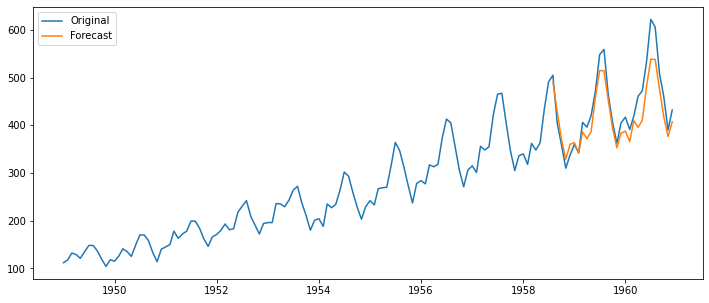

In [ ]:
plt.subplots(figsize=(12,5))
# plt.vlines(10, 0, 650, linestyles='--', color='r', label = 'Start of Forecast')
plt.plot(list(df.index), df['passengers'], label='Original')
plt.plot(pred_index, pred_values, label='Forecast')
plt.legend()